Importing Packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.corr().nlargest(10,'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Check and Remove Outliers from above features

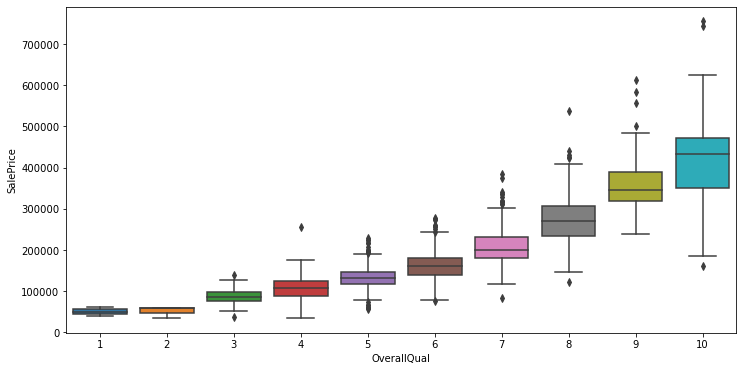

In [9]:
f,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)

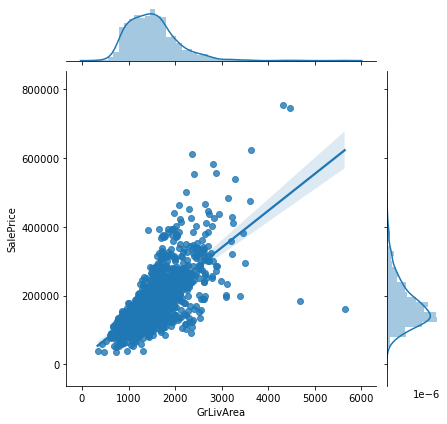

In [10]:
sns.jointplot(x=df_train['GrLivArea'],y=df_train['SalePrice'],kind='reg')

In [11]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4200)& (df_train['SalePrice']<200000)].index)

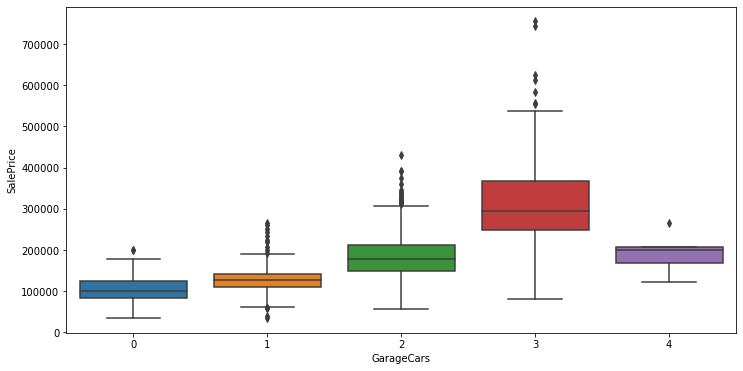

In [12]:
f,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(x='GarageCars', y='SalePrice', data=df_train)

In [13]:
df_train = df_train.drop(df_train[(df_train['GarageCars']>3)&(df_train['SalePrice']<300000)].index)

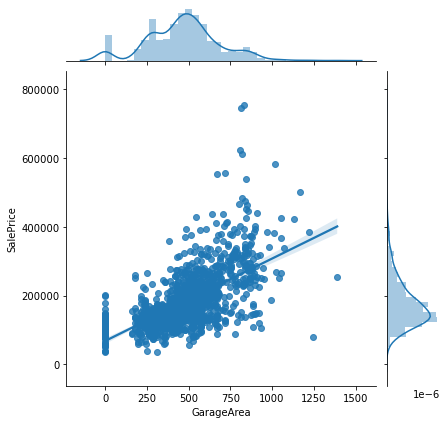

In [14]:
sns.jointplot(x=df_train['GarageArea'],y=df_train['SalePrice'],kind='reg')

In [15]:
df_train = df_train.drop(df_train[(df_train['GarageArea']>1200) & (df_train['SalePrice']<300000)].index)

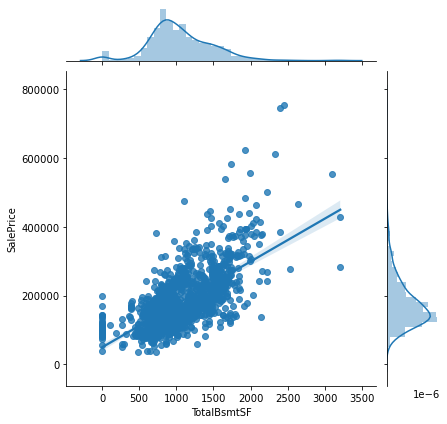

In [16]:
sns.jointplot(x=df_train['TotalBsmtSF'],y=df_train['SalePrice'],kind='reg')

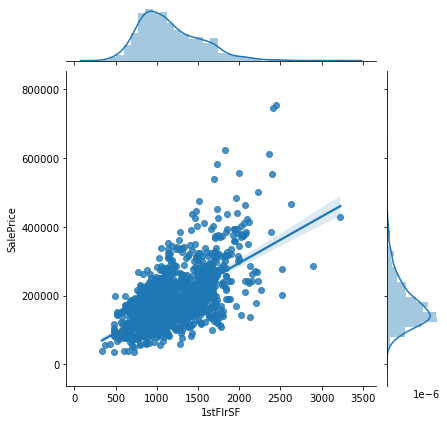

In [17]:
sns.jointplot(x=df_train['1stFlrSF'],y=df_train['SalePrice'],kind='reg')

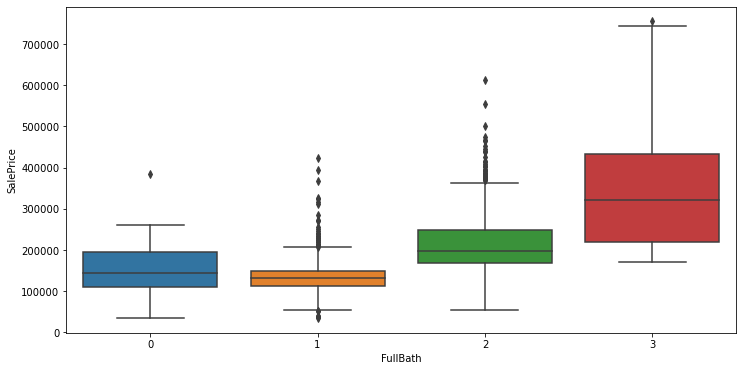

In [18]:
f,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(x='FullBath', y='SalePrice', data=df_train)

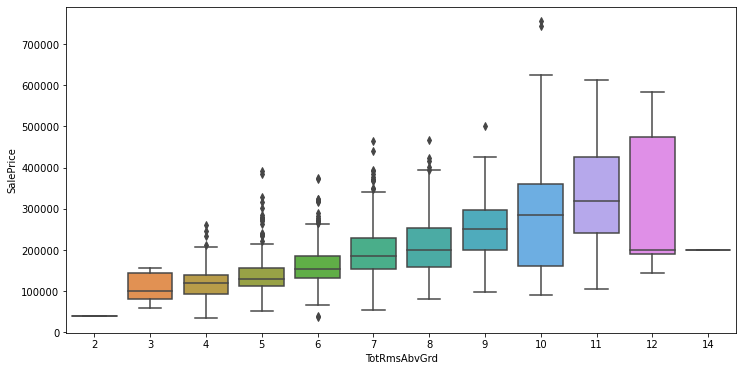

In [19]:
plt.figure(figsize=(12,6))
fig = sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df_train)
#sns.jointplot(x=df_train['TotRmsAbvGrd'],y=df_train['SalePrice'],kind='reg')

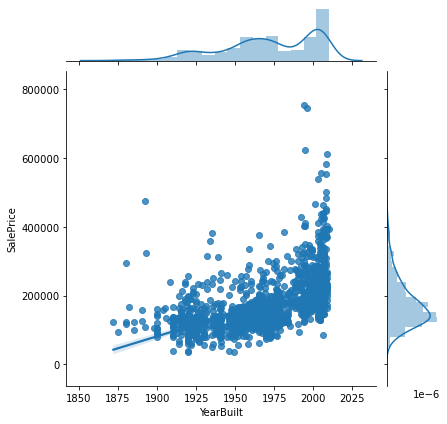

In [20]:
sns.jointplot(x=df_train['YearBuilt'],y=df_train['SalePrice'],kind='reg')

Check how much missing values and their percentage in train dataframe

In [21]:
null_count = df_train.isnull().sum()
null_cent = (null_count/len(df_train))*100
chk_missing = pd.DataFrame({'null_val_count':null_count,'percent':null_cent})
chk_missing[chk_missing['null_val_count']!=0].sort_values('percent',ascending=False)

,null_val_count,percent
PoolQC,1445,99.586492
MiscFeature,1398,96.347347
Alley,1361,93.797381
Fence,1171,80.702963
FireplaceQu,686,47.277739
LotFrontage,258,17.780841
GarageType,81,5.582357
GarageYrBlt,81,5.582357
GarageFinish,81,5.582357
GarageQual,81,5.582357


Filling up missing values for train data

In [22]:
df_train = df_train.drop(['PoolQC','MiscFeature','Alley'],axis=1)
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_train['Fence'] = df_train['Fence'].fillna('None')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('None')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('Unf')
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('None')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('TA')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('None')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')
df_train['GarageType'] = df_train['GarageType'].fillna('Attchd')
df_train['GarageQual'] = df_train['GarageQual'].fillna('TA')
df_train['GarageCond'] = df_train['GarageCond'].fillna('TA')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('None')
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [23]:
df_train['GarageYrBlt'] = df_train.apply(lambda row: row['YearBuilt'] if np.isnan(row['GarageYrBlt'])
                                         else row['GarageYrBlt'],axis=1)

Feature Engineering

In [24]:
print('MSSubClass: ',df_train['MSSubClass'].dtypes)
print('OverallCond: ',df_train['OverallCond'].dtypes)
print('YrSold: ',df_train['YrSold'].dtypes)
print('MoSold: ',df_train['MoSold'].dtypes)

MSSubClass:  int64
OverallCond:  int64
YrSold:  int64
MoSold:  int64


features seem categorical but interpreted as numerical somewhere

In [25]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)

In [26]:
df_train['OverallCond'] = df_train['OverallCond'].astype(str)

In [27]:
df_train['YrSold'] = df_train['YrSold'].astype(str)

In [28]:
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [29]:
df_train.select_dtypes(object).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder
train_cols = ('MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
        'MoSold', 'YrSold', 'SaleType','SaleCondition')

for c in train_cols:
    lben = LabelEncoder()
    lben.fit(list(df_train[c].values))
    df_train[c] = lben.transform(list(df_train[c].values))

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int32  
 2   MSZoning       1451 non-null   int32  
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   int32  
 6   LotShape       1451 non-null   int32  
 7   LandContour    1451 non-null   int32  
 8   Utilities      1451 non-null   int32  
 9   LotConfig      1451 non-null   int32  
 10  LandSlope      1451 non-null   int32  
 11  Neighborhood   1451 non-null   int32  
 12  Condition1     1451 non-null   int32  
 13  Condition2     1451 non-null   int32  
 14  BldgType       1451 non-null   int32  
 15  HouseStyle     1451 non-null   int32  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int32  
 18  YearBuil

Test Data manipulation

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Check how much missing values and their percentage in test dataframe

In [33]:
null_count = df_test.isnull().sum()
null_cent = (null_count/len(df_test))*100
chk_missing = pd.DataFrame({'null_val_count':null_count,'percent':null_cent})
chk_missing[chk_missing['null_val_count']!=0].sort_values('percent',ascending=False)

,null_val_count,percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


Filling up missing values for test data

In [34]:
df_test = df_test.drop(['PoolQC','MiscFeature','Alley'],axis=1)

In [35]:
df_test['Fence'] = df_test['Fence'].fillna('None')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('None')
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('None')
df_test['GarageCond'] = df_test['GarageCond'].fillna('TA')
df_test['GarageQual'] = df_test['GarageQual'].fillna('TA')
df_test['GarageType'] = df_test['GarageType'].fillna('Attchd')
df_test['GarageYrBlt'] = df_test.apply(lambda row: row['YearBuilt'] if np.isnan(row['GarageYrBlt'])
                                         else row['GarageYrBlt'],axis=1)
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('TA')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('TA')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('None')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('None')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('Unf')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)
df_test['Functional'] = df_test['Functional'].fillna('Typ')
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('VinylSd')
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('VinylSd')
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')
df_test['SaleType'] = df_test['SaleType'].fillna('WD')

Feature Engineering

In [36]:
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

Converting categorical values to numerical values in train dataset

In [37]:
df_test.select_dtypes(object).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
test_cols = ('MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
        'MoSold', 'YrSold', 'SaleType','SaleCondition')

for c in test_cols:
    lben = LabelEncoder()
    lben.fit(list(df_test[c].values))
    df_test[c] = lben.transform(list(df_test[c].values))

Check shape of train and test data

In [39]:
print(df_train.shape)
print(df_test.shape)

(1451, 78)
(1459, 77)


In [40]:
X = df_train.drop('SalePrice',axis=1)
y = df_train['SalePrice']

Data Standarization 

In [41]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

splitting data into train and test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear Regression:

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [52]:
prediction = reg.predict(X_test)

In [47]:
print(reg.intercept_)

181398.88140394088


In [48]:
print(reg.coef_)

[-3.91963088e+02 -4.43491992e+02 -1.05151879e+03  1.94332457e+03
  4.60678163e+03  1.49932776e+03 -7.58615570e+02 -1.93582880e+03
 -7.03725224e+02  3.76144663e+02 -7.91303081e+02  2.64432322e+02
 -3.79086696e+02 -5.69659970e+02 -4.27386915e+03 -1.80174483e+03
  9.69692515e+03  6.35351907e+03  8.51465755e+03  8.21327349e+02
  1.43221237e+03  1.85610550e+03 -4.38147494e+03  3.16755774e+03
  4.31847488e+03  7.93252567e+03 -8.22977752e+03  6.47888415e+02
  9.61446055e+02 -5.77573269e+03  1.08243574e+03 -2.71715555e+03
  1.18324869e+03 -5.38808168e+15  1.96179264e+03 -2.01597433e+15
 -5.48958096e+15  5.17090429e+15 -1.51914397e+03 -8.52258669e+02
 -3.59610789e+02  3.62736200e+02  1.73630893e+15  2.02934366e+15
  2.27771084e+14 -2.36601923e+15  7.88075561e+02 -1.39848747e+02
  4.44421474e+02 -6.73504715e+02 -6.15641441e+03 -5.08882048e+03
 -5.99303581e+03  4.17272306e+03  4.58959918e+03  1.45427063e+03
 -1.23286544e+03  2.11306273e+03 -1.00583058e+03 -1.31151372e+03
  1.48566563e+03  3.05712

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,prediction))
print('Mean Squared Error: ', mean_squared_error(y_test,prediction))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,prediction)))

Mean Absolute Error:  19198.264970900025
Mean Squared Error:  698072737.4307003
Root Mean Squared Error:  26421.066167562207


In [53]:
sns.relplot(x="y_test", y="prediction", hue="SalePrice", kind="line", data=df_train);

ValueError: Could not interpret input 'y_test'